# Marketing Research: Customer's satisfaction on the Apple AirPods product

#### By Dexter Nguyen

## Outline
1. Importing libraries
2. Read dataset
3. Cleaning data
4. Exploratory Data Analysis
5. Convert to dummy variables and Correlation Matrix
6. Modeling and Evaluation
7. Feature Importance

### 1. Importing Libraries

In [75]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

import numpy as np
import plotly.express as px

print('Libraries imported.')

Libraries imported.


### 2. Read data set

In [76]:
# Find out your current working directory
import os
print(os.getcwd())

C:\Users\Thanh Tinh Nguyen\GitHubDatabase\Classification-Satisfaction-Apple-AirPods


In [77]:
# Read data from file 'Data.csv' 
data=pd.read_csv("Data.csv", encoding= 'unicode_escape')
data.head()

Model Smartphone Usage_Length  \
0                 2nd generation     Iphone   3-6 months   
1                 2nd generation    Android   3-6 months   
2                    AirPods Pro    Android   3-6 months   
3                 2nd generation     Iphone   3-6 months   
4  1st generation,2nd generation    Android   3-6 months   

             Usage_Frequency     Usage_Moment Total_Hours_Usage  \
0  More than 5 times per day  Early afternoon         2-4 hours   
1          2-3 times per day  Early afternoon         1-2 hours   
2          4-5 times per day  Early afternoon         2-4 hours   
3          4-5 times per day   Late afternoon         2-4 hours   
4          2-3 times per day          Evening         1-2 hours   

                               Associated_Activities  Regular_Rank_Walking  \
0  Walking,Phone call,Exercising,Working/Studying...                   1.0   
1                              Phone call,Exercising                   2.0   
2                                 Walking,Phone call                   3.0   
3                                         Phone call                   3.0   
4                                         Phone call                   1.0   

   Regular_Rank_PhoneCall  Regular_Rank_Exercising  ...  \
0                     2.0                      3.0  ...   
1                     1.0                      3.0  ...   
2                     1.0                      4.0  ...   
3                     1.0                      2.0  ...   
4                     2.0                      3.0  ...   

   Importance_Water_resistance(Pro)  Change_suggestion    Age  Gender  \
0                         Important                NaN  26-35    Male   
1                         Important                NaN  18-25    Male   
2                         Important                NaN  26-35    Male   
3                  Fairly important                NaN  26-35  Female   
4                  Fairly important                NaN  36-45  Female   

      Employment_status     Student_degree Student_program  \
0         Self-employed                NaN             NaN   
1               Student  Full-time student        Graduate   
2               Student  Full-time student        Graduate   
3  Part-time employment                NaN             NaN   
4  Part-time employment                NaN             NaN   

  Student_program_length Student_current_year Student_major  
0                    NaN                  NaN           NaN  
1                 1 year             1st year      Business  
2                2 years             1st year      Business  
3                    NaN                  NaN           NaN  
4                    NaN                  NaN           NaN  

[5 rows x 41 columns]

In [78]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in data.columns)

True

In [79]:
# View the information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model                                   89 non-null     object 
 1   Smartphone                              89 non-null     object 
 2   Usage_Length                            89 non-null     object 
 3   Usage_Frequency                         89 non-null     object 
 4   Usage_Moment                            89 non-null     object 
 5   Total_Hours_Usage                       89 non-null     object 
 6   Associated_Activities                   89 non-null     object 
 7   Regular_Rank_Walking                    88 non-null     float64
 8   Regular_Rank_PhoneCall                  88 non-null     float64
 9   Regular_Rank_Exercising                 88 non-null     float64
 10  Regular_Rank_Working/Studying           88 non-null     float64


### 3. Cleaning data

In [80]:
# Total missing values for each feature
data.isnull().sum()

Model                                      0
Smartphone                                 0
Usage_Length                               0
Usage_Frequency                            0
Usage_Moment                               0
Total_Hours_Usage                          0
Associated_Activities                      0
Regular_Rank_Walking                       1
Regular_Rank_PhoneCall                     1
Regular_Rank_Exercising                    1
Regular_Rank_Working/Studying              1
Regular_Rank_Reading                       1
Regular_Rank_Sleeping                      1
Satisfaction_Design                        0
Satisfaction_Secure_fit_in_ears            0
Satisfaction_Sound_quality                 0
Satisfaction_Tapping_function              0
Satisfaction_Charging_speed                0
Satisfaction_Bluetooth_pairing_process     0
Satisfaction_Battery_life                  0
Satisfaction_Noise_cancellation(Pro)       0
Satisfaction_Water_resistance(Pro)         0
Overall_sa

In [81]:
# Create a copy to be used for cleaning
temp0=data.copy()

# Replace missingvalues by using median approach for numerical values 
median = temp0['Regular_Rank_Walking'].median()
temp0['Regular_Rank_Walking'].fillna(median, inplace=True)

median = temp0['Regular_Rank_PhoneCall'].median()
temp0['Regular_Rank_PhoneCall'].fillna(median, inplace=True)

median = temp0['Regular_Rank_Exercising'].median()
temp0['Regular_Rank_Exercising'].fillna(median, inplace=True)

median = temp0['Regular_Rank_Working/Studying'].median()
temp0['Regular_Rank_Working/Studying'].fillna(median, inplace=True)

median = temp0['Regular_Rank_Reading'].median()
temp0['Regular_Rank_Reading'].fillna(median, inplace=True)

median = temp0['Regular_Rank_Sleeping'].median()
temp0['Regular_Rank_Sleeping'].fillna(median, inplace=True)

# Check
temp0.isnull().sum()

Model                                      0
Smartphone                                 0
Usage_Length                               0
Usage_Frequency                            0
Usage_Moment                               0
Total_Hours_Usage                          0
Associated_Activities                      0
Regular_Rank_Walking                       0
Regular_Rank_PhoneCall                     0
Regular_Rank_Exercising                    0
Regular_Rank_Working/Studying              0
Regular_Rank_Reading                       0
Regular_Rank_Sleeping                      0
Satisfaction_Design                        0
Satisfaction_Secure_fit_in_ears            0
Satisfaction_Sound_quality                 0
Satisfaction_Tapping_function              0
Satisfaction_Charging_speed                0
Satisfaction_Bluetooth_pairing_process     0
Satisfaction_Battery_life                  0
Satisfaction_Noise_cancellation(Pro)       0
Satisfaction_Water_resistance(Pro)         0
Overall_sa

In [82]:
# To be convenient for further analysis, replace text with value in dataset 
temp0 = temp0.replace(['Completely satisfied'], 1)
temp0 = temp0.replace(['Very satisfied'], 2)
temp0 = temp0.replace(['Satisfied'], 3)
temp0 = temp0.replace(['Somewhat satisfied'], 4)
temp0 = temp0.replace(['Not satisfied'], 5)

temp0 = temp0.replace(['Extremely important'], 1)
temp0 = temp0.replace(['Fairly important'], 2)
temp0 = temp0.replace(['Important'], 3)
temp0 = temp0.replace(['Somewhat important'], 4)
temp0 = temp0.replace(['Not important'], 5)

# check
temp0.head()

Model Smartphone Usage_Length  \
0                 2nd generation     Iphone   3-6 months   
1                 2nd generation    Android   3-6 months   
2                    AirPods Pro    Android   3-6 months   
3                 2nd generation     Iphone   3-6 months   
4  1st generation,2nd generation    Android   3-6 months   

             Usage_Frequency     Usage_Moment Total_Hours_Usage  \
0  More than 5 times per day  Early afternoon         2-4 hours   
1          2-3 times per day  Early afternoon         1-2 hours   
2          4-5 times per day  Early afternoon         2-4 hours   
3          4-5 times per day   Late afternoon         2-4 hours   
4          2-3 times per day          Evening         1-2 hours   

                               Associated_Activities  Regular_Rank_Walking  \
0  Walking,Phone call,Exercising,Working/Studying...                   1.0   
1                              Phone call,Exercising                   2.0   
2                                 Walking,Phone call                   3.0   
3                                         Phone call                   3.0   
4                                         Phone call                   1.0   

   Regular_Rank_PhoneCall  Regular_Rank_Exercising  ...  \
0                     2.0                      3.0  ...   
1                     1.0                      3.0  ...   
2                     1.0                      4.0  ...   
3                     1.0                      2.0  ...   
4                     2.0                      3.0  ...   

   Importance_Water_resistance(Pro)  Change_suggestion    Age  Gender  \
0                                 3                NaN  26-35    Male   
1                                 3                NaN  18-25    Male   
2                                 3                NaN  26-35    Male   
3                                 2                NaN  26-35  Female   
4                                 2                NaN  36-45  Female   

      Employment_status     Student_degree  Student_program  \
0         Self-employed                NaN              NaN   
1               Student  Full-time student         Graduate   
2               Student  Full-time student         Graduate   
3  Part-time employment                NaN              NaN   
4  Part-time employment                NaN              NaN   

   Student_program_length  Student_current_year  Student_major  
0                     NaN                   NaN            NaN  
1                  1 year              1st year       Business  
2                 2 years              1st year       Business  
3                     NaN                   NaN            NaN  
4                     NaN                   NaN            NaN  

[5 rows x 41 columns]

In [83]:
# Convert string columns to factor/categorical types
temp0['Model'] = temp0['Model'].astype('category')
temp0['Smartphone'] = temp0['Smartphone'].astype('category')
temp0['Usage_Length'] = temp0['Usage_Length'].astype('category')
temp0['Usage_Frequency'] = temp0['Usage_Frequency'].astype('category')
temp0['Usage_Moment'] = temp0['Usage_Moment'].astype('category')
temp0['Total_Hours_Usage'] = temp0['Total_Hours_Usage'].astype('category')
temp0['Associated_Activities'] = temp0['Associated_Activities'].astype('category')

temp0['Age'] = temp0['Age'].astype('category')
temp0['Gender'] = temp0['Gender'].astype('category')
temp0['Employment_status'] = temp0['Employment_status'].astype('category')
temp0['Student_degree'] = temp0['Student_degree'].astype('category')
temp0['Student_program'] = temp0['Student_program'].astype('category')
temp0['Student_program_length'] = temp0['Student_program_length'].astype('category')
temp0['Student_current_year'] = temp0['Student_current_year'].astype('category')
temp0['Student_major'] = temp0['Student_major'].astype('category')

# check
temp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Model                                   89 non-null     category
 1   Smartphone                              89 non-null     category
 2   Usage_Length                            89 non-null     category
 3   Usage_Frequency                         89 non-null     category
 4   Usage_Moment                            89 non-null     category
 5   Total_Hours_Usage                       89 non-null     category
 6   Associated_Activities                   89 non-null     category
 7   Regular_Rank_Walking                    89 non-null     float64 
 8   Regular_Rank_PhoneCall                  89 non-null     float64 
 9   Regular_Rank_Exercising                 89 non-null     float64 
 10  Regular_Rank_Working/Studying           89 non-null 

### 4. Exploratory Data Analysis

In [84]:
# Creat temp1
temp1=temp0.copy()

In [85]:
# Shape of the data frame
temp1.shape

(89, 41)

(0.0, 50.0)

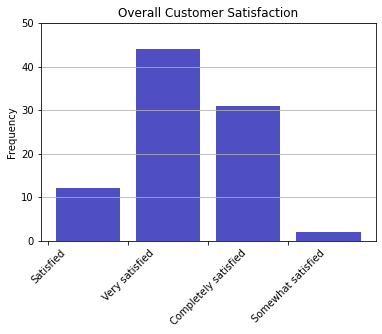

In [128]:
# Histogram of Overall Satisfaction - target variable
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data["Overall_satisfaction"], bins=range(5), color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.grid(axis='y', alpha=1)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Overall Customer Satisfaction')
plt.xticks(rotation=45)

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [138]:
temp1.iloc[:,13:17].describe()

Satisfaction_Design  Satisfaction_Secure_fit_in_ears  \
count            89.000000                        89.000000   
mean              1.853933                         2.179775   
std               0.860108                         1.211327   
min               1.000000                         1.000000   
25%               1.000000                         1.000000   
50%               2.000000                         2.000000   
75%               2.000000                         3.000000   
max               4.000000                         5.000000   

       Satisfaction_Sound_quality  Satisfaction_Tapping_function  
count                   89.000000                      89.000000  
mean                     2.134831                       2.449438  
std                      0.955736                       1.167858  
min                      1.000000                       1.000000  
25%                      1.000000                       1.000000  
50%                      2.000000                       2.000000  
75%                      3.000000                       3.000000  
max                      4.000000                       5.000000

In [140]:
temp1.iloc[:,17:22].describe()

Satisfaction_Charging_speed  Satisfaction_Bluetooth_pairing_process  \
count                    89.000000                               89.000000   
mean                      1.674157                                2.011236   
std                       0.808693                                1.081816   
min                       1.000000                                1.000000   
25%                       1.000000                                1.000000   
50%                       1.000000                                2.000000   
75%                       2.000000                                3.000000   
max                       4.000000                                5.000000   

       Satisfaction_Battery_life  Satisfaction_Noise_cancellation(Pro)  \
count                  89.000000                             89.000000   
mean                    2.056180                              3.876404   
std                     1.080399                              1.420789   
min                     1.000000                              1.000000   
25%                     1.000000                              3.000000   
50%                     2.000000                              5.000000   
75%                     3.000000                              5.000000   
max                     5.000000                              5.000000   

       Satisfaction_Water_resistance(Pro)  
count                           89.000000  
mean                             3.820225  
std                              1.458220  
min                              1.000000  
25%                              3.000000  
50%                              5.000000  
75%                              5.000000  
max                              5.000000

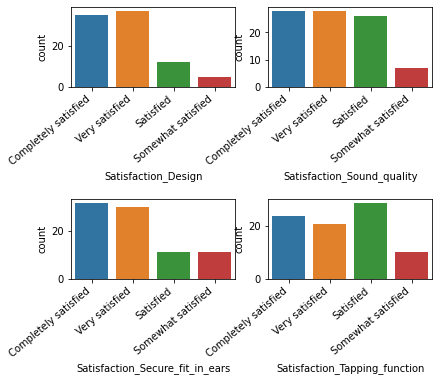

In [125]:
# Visualize the customer satisfaction on features
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax00 = fig.add_subplot(gs[0, 0])
ax00 = sns.countplot(x="Satisfaction_Design", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax00.set_xticklabels(ax00.get_xticklabels(), rotation=40, ha="right")

ax01 = fig.add_subplot(gs[2, 0])
ax01 = sns.countplot(x="Satisfaction_Secure_fit_in_ears", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=40, ha="right")

ax02 = fig.add_subplot(gs[0, 1])
ax02 = sns.countplot(x="Satisfaction_Sound_quality", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax02.set_xticklabels(ax02.get_xticklabels(), rotation=40, ha="right")

ax03 = fig.add_subplot(gs[2, 1])
ax03 = sns.countplot(x="Satisfaction_Tapping_function", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax03.set_xticklabels(ax03.get_xticklabels(), rotation=40, ha="right")

plt.show()

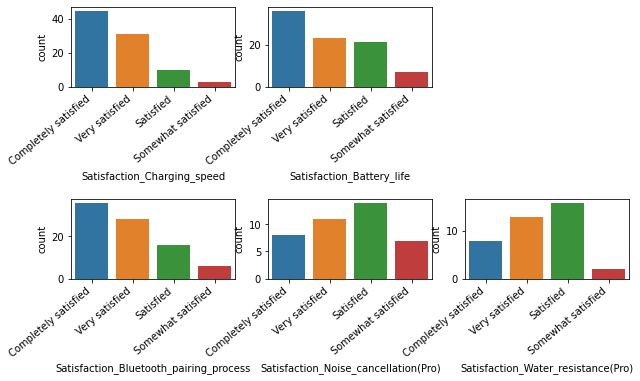

In [126]:
# Visualize the customer satisfaction on features
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax10 = fig.add_subplot(gs[0, 0])
ax10 = sns.countplot(x="Satisfaction_Charging_speed", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=40, ha="right")

ax11 = fig.add_subplot(gs[2, 0])
ax11 = sns.countplot(x="Satisfaction_Bluetooth_pairing_process", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=40, ha="right")

ax12 = fig.add_subplot(gs[0, 1])
ax12 = sns.countplot(x="Satisfaction_Battery_life", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=40, ha="right")

ax13 = fig.add_subplot(gs[2, 1])
ax13 = sns.countplot(x="Satisfaction_Noise_cancellation(Pro)", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=40, ha="right")

ax14 = fig.add_subplot(gs[2, 2])
ax14 = sns.countplot(x="Satisfaction_Water_resistance(Pro)", data=data, order=["Completely satisfied", "Very satisfied", "Satisfied", "Somewhat satisfied"])
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=40, ha="right")

plt.show()

This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram


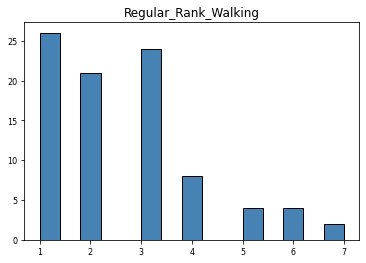

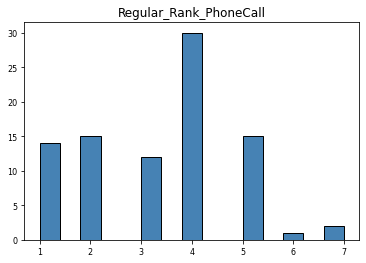

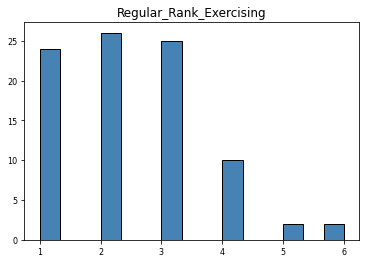

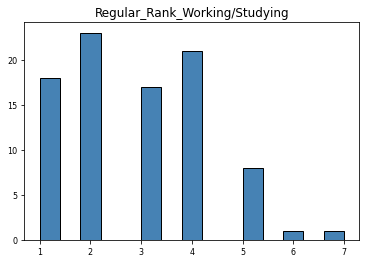

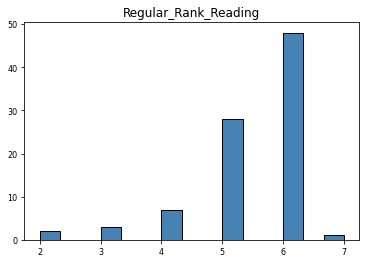

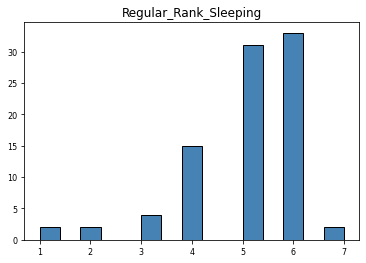

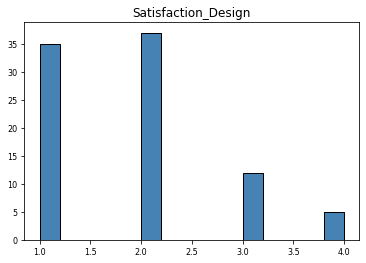

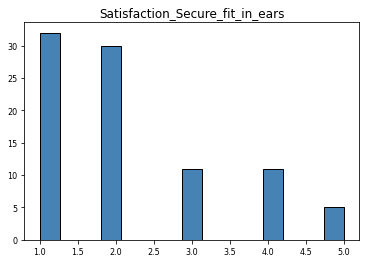

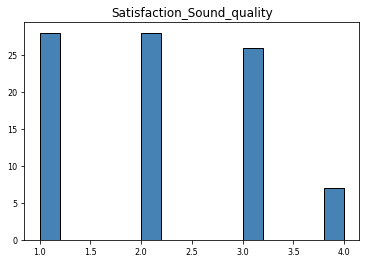

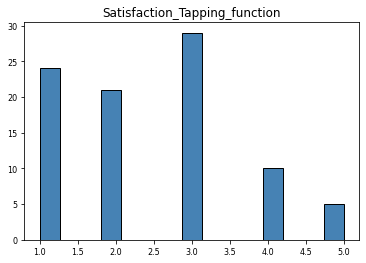

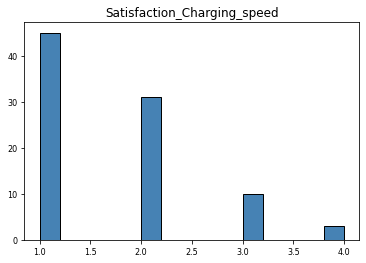

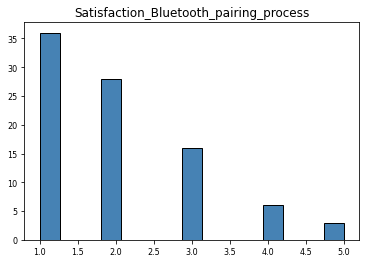

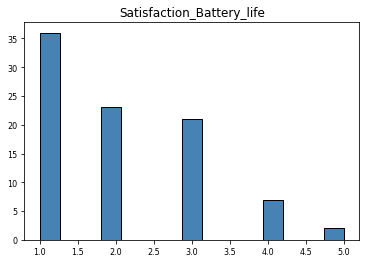

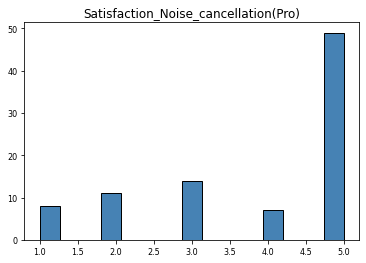

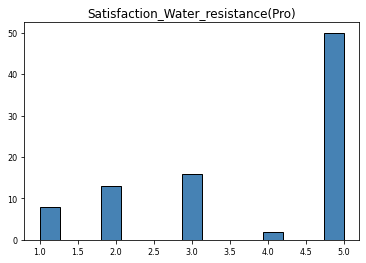

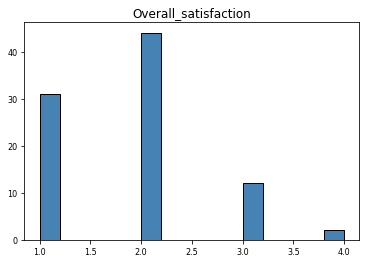

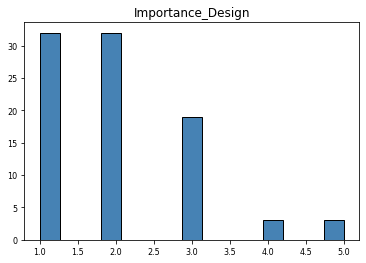

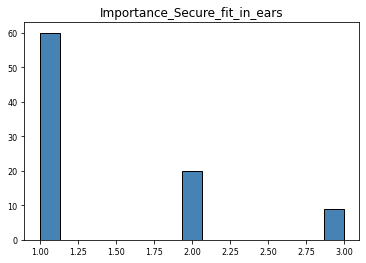

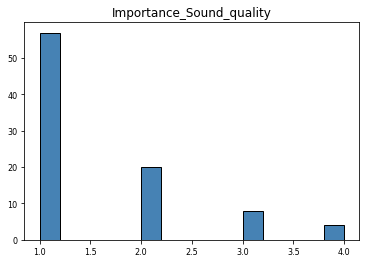

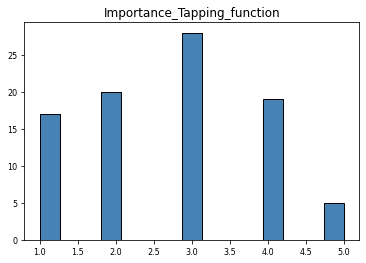

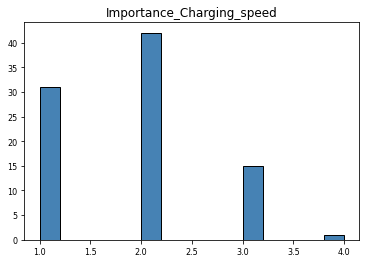

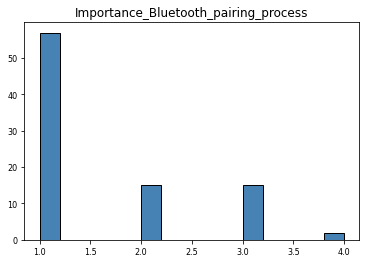

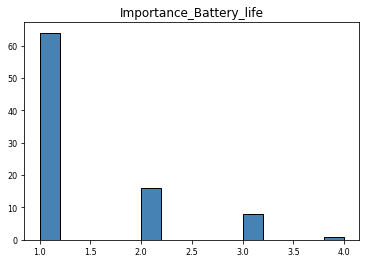

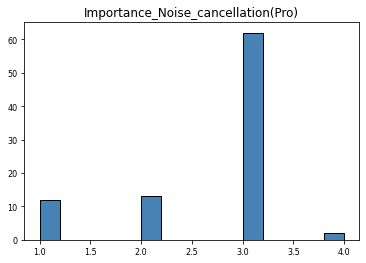

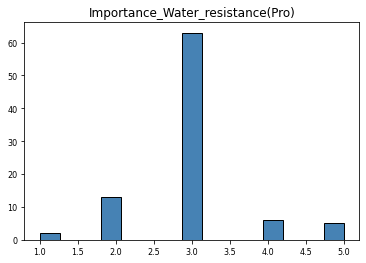

In [87]:
# Visualize the histograms of each numerical variables (ranking of activities, satisfaction and importance of each functions)

for col in temp1.columns: 
    try:      
        temp1[col] = pd.to_numeric(temp1[col]) 
        temp1.hist(column=col,bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)
    except ValueError:
        print('This column can not be represented as a histogram')

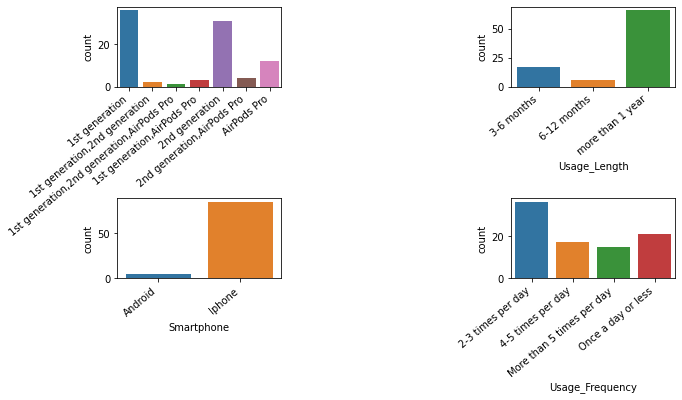

In [88]:
# Visualize the customer behavior: AirPods models, Smartphone models, Usage length and frequency)
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x="Model", data=temp1)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=40, ha="right")

ax1 = fig.add_subplot(gs[2, 0])
ax1 = sns.countplot(x="Smartphone", data=temp1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

ax2 = fig.add_subplot(gs[0, 2])
ax2 = sns.countplot(x="Usage_Length", data=temp1)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

ax3 = fig.add_subplot(gs[2, 2])
ax3 = sns.countplot(x="Usage_Frequency", data=temp1)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")

plt.show()

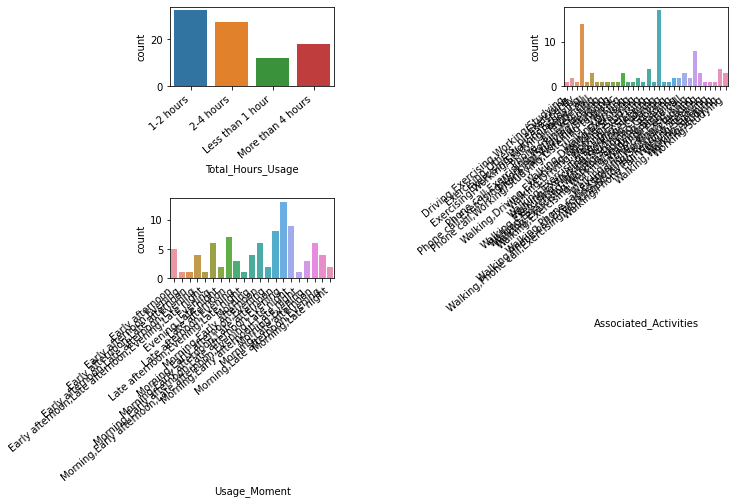

In [89]:
# Visualize the customer behavior: Usage length and frequency) (to be used in further text analysis)
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax4 = fig.add_subplot(gs[2, 0])
ax4 = sns.countplot(x="Usage_Moment", data=temp1)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")

ax5 = fig.add_subplot(gs[0, 0])
ax5 = sns.countplot(x="Total_Hours_Usage", data=temp1)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")

ax6 = fig.add_subplot(gs[0, 2])
ax6 = sns.countplot(x="Associated_Activities", data=temp1)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=40, ha="right")

plt.show()

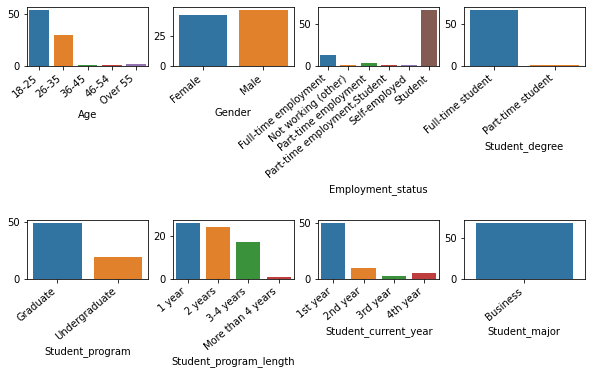

In [90]:
# Customer demographic
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=4, ncols=4)

ax7 = fig.add_subplot(gs[0, 0])
ax7 = sns.countplot(x="Age", data=temp1)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=40, ha="right")
ax7.set_ylabel('') 

ax8 = fig.add_subplot(gs[0, 1])
ax8 = sns.countplot(x="Gender", data=temp1)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=40, ha="right")
ax8.set_ylabel('') 

ax9 = fig.add_subplot(gs[0, 2])
ax9 = sns.countplot(x="Employment_status", data=temp1)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=40, ha="right")
ax9.set_ylabel('') 

ax10 = fig.add_subplot(gs[0, 3])
ax10 = sns.countplot(x="Student_degree", data=temp1)
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=40, ha="right")
ax10.set_ylabel('') 

ax11 = fig.add_subplot(gs[3, 0])
ax11 = sns.countplot(x="Student_program", data=temp1)
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=40, ha="right")
ax11.set_ylabel('') 

ax12 = fig.add_subplot(gs[3, 1])
ax12 = sns.countplot(x="Student_program_length", data=temp1)
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=40, ha="right")
ax12.set_ylabel('') 

ax13 = fig.add_subplot(gs[3, 2])
ax13 = sns.countplot(x="Student_current_year", data=temp1)
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=40, ha="right")
ax13.set_ylabel('') 

ax14 = fig.add_subplot(gs[3, 3])
ax14 = sns.countplot(x="Student_major", data=temp1)
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=40, ha="right")
ax14.set_ylabel('') 

plt.show()

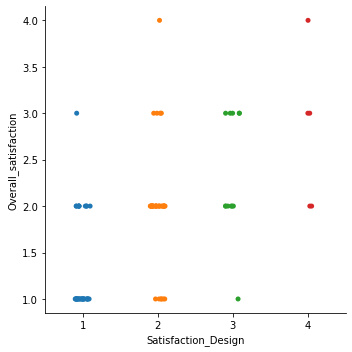

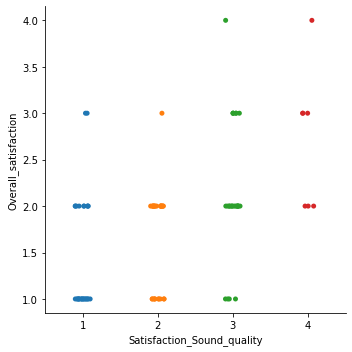

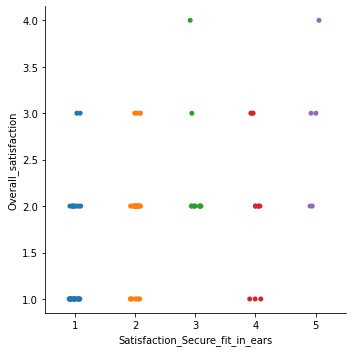

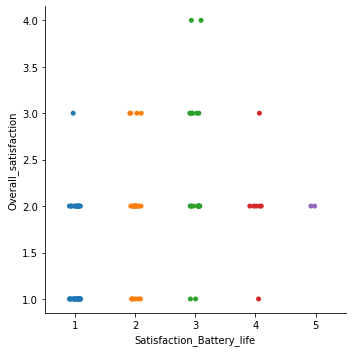

In [91]:
# 2D visualization
import seaborn as sns
import matplotlib.pyplot as plt

v00 = sns.catplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Design")

v01 = sns.catplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Sound_quality")

v02 = sns.catplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Secure_fit_in_ears")

v03 = sns.catplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Battery_life")

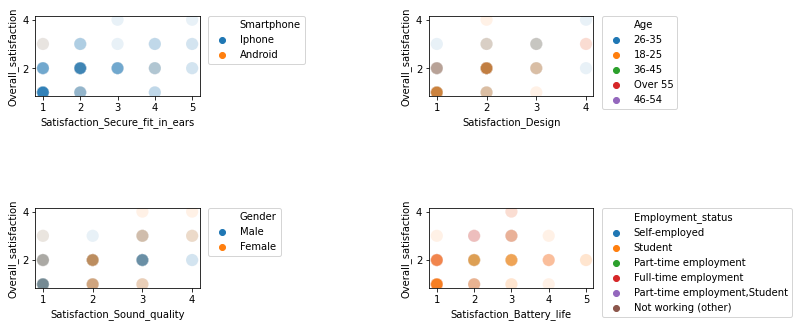

In [92]:
# 3D visualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

v1 = fig.add_subplot(gs[0, 2])
v1 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Design", hue="Age", s=150, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v2 = fig.add_subplot(gs[2, 0])
v2 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Sound_quality", hue="Gender",s=150, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v3 = fig.add_subplot(gs[0, 0])
v3 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Secure_fit_in_ears", hue="Smartphone",s=150, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v4 = fig.add_subplot(gs[2, 2])
v4 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Satisfaction_Battery_life", hue="Employment_status",s=150, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

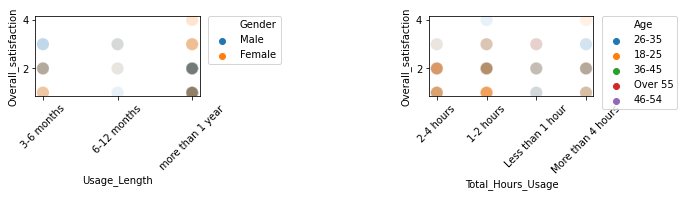

In [93]:
# 3D visualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

v5 = fig.add_subplot(gs[0, 2])
v5 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Total_Hours_Usage", hue="Age", s=150, alpha=0.1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v6 = fig.add_subplot(gs[0, 0])
v6 = sns.scatterplot(data=temp1, y="Overall_satisfaction", x="Usage_Length", hue="Gender",s=150, alpha=0.1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### 5. Convert to dummy variables and Correlation Matrix

In [94]:
temp3=temp0.copy()

# Drop irrelevant variables
temp4=temp3.drop(columns=['Change_suggestion','Student_degree','Student_program','Student_program_length','Student_major','Student_current_year'])

# Check
temp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Model                                   89 non-null     category
 1   Smartphone                              89 non-null     category
 2   Usage_Length                            89 non-null     category
 3   Usage_Frequency                         89 non-null     category
 4   Usage_Moment                            89 non-null     category
 5   Total_Hours_Usage                       89 non-null     category
 6   Associated_Activities                   89 non-null     category
 7   Regular_Rank_Walking                    89 non-null     float64 
 8   Regular_Rank_PhoneCall                  89 non-null     float64 
 9   Regular_Rank_Exercising                 89 non-null     float64 
 10  Regular_Rank_Working/Studying           89 non-null 

In [95]:
# Convert categorical data to dummies for further analysis 
temp4=pd.get_dummies(temp4, columns=['Model'])
temp4=pd.get_dummies(temp4, columns=['Smartphone'])
temp4=pd.get_dummies(temp4, columns=['Usage_Length'])
temp4=pd.get_dummies(temp4, columns=['Usage_Frequency'])
temp4=pd.get_dummies(temp4, columns=['Usage_Moment'])
temp4=pd.get_dummies(temp4, columns=['Total_Hours_Usage'])
temp4=pd.get_dummies(temp4, columns=['Associated_Activities'])
temp4=pd.get_dummies(temp4, columns=['Age'])
temp4=pd.get_dummies(temp4, columns=['Gender'])
temp4=pd.get_dummies(temp4, columns=['Employment_status'])

# Check
temp4.shape
temp4.head()

Regular_Rank_Walking  Regular_Rank_PhoneCall  Regular_Rank_Exercising  \
0                   1.0                     2.0                      3.0   
1                   2.0                     1.0                      3.0   
2                   3.0                     1.0                      4.0   
3                   3.0                     1.0                      2.0   
4                   1.0                     2.0                      3.0   

   Regular_Rank_Working/Studying  Regular_Rank_Reading  Regular_Rank_Sleeping  \
0                            4.0                   5.0                    6.0   
1                            4.0                   5.0                    6.0   
2                            2.0                   6.0                    5.0   
3                            4.0                   5.0                    6.0   
4                            4.0                   5.0                    6.0   

   Satisfaction_Design  Satisfaction_Secure_fit_in_ears  \
0                    1                                2   
1                    4                                1   
2                    2                                2   
3                    2                                2   
4                    2                                2   

   Satisfaction_Sound_quality  Satisfaction_Tapping_function  ...  Age_46-54  \
0                           3                              2  ...          0   
1                           1                              1  ...          0   
2                           3                              2  ...          0   
3                           2                              2  ...          0   
4                           2                              2  ...          0   

   Age_Over 55  Gender_Female  Gender_Male  \
0            0              0            1   
1            0              0            1   
2            0              0            1   
3            0              1            0   
4            0              1            0   

   Employment_status_Full-time employment  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Employment_status_Not working (other)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Employment_status_Part-time employment  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       1   

   Employment_status_Part-time employment,Student  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Employment_status_Self-employed  Employment_status_Student  
0                                1                          0  
1                                0                          1  
2                                0                          1  
3                                0                          0  
4                                0                          0  

[5 rows x 111 columns]

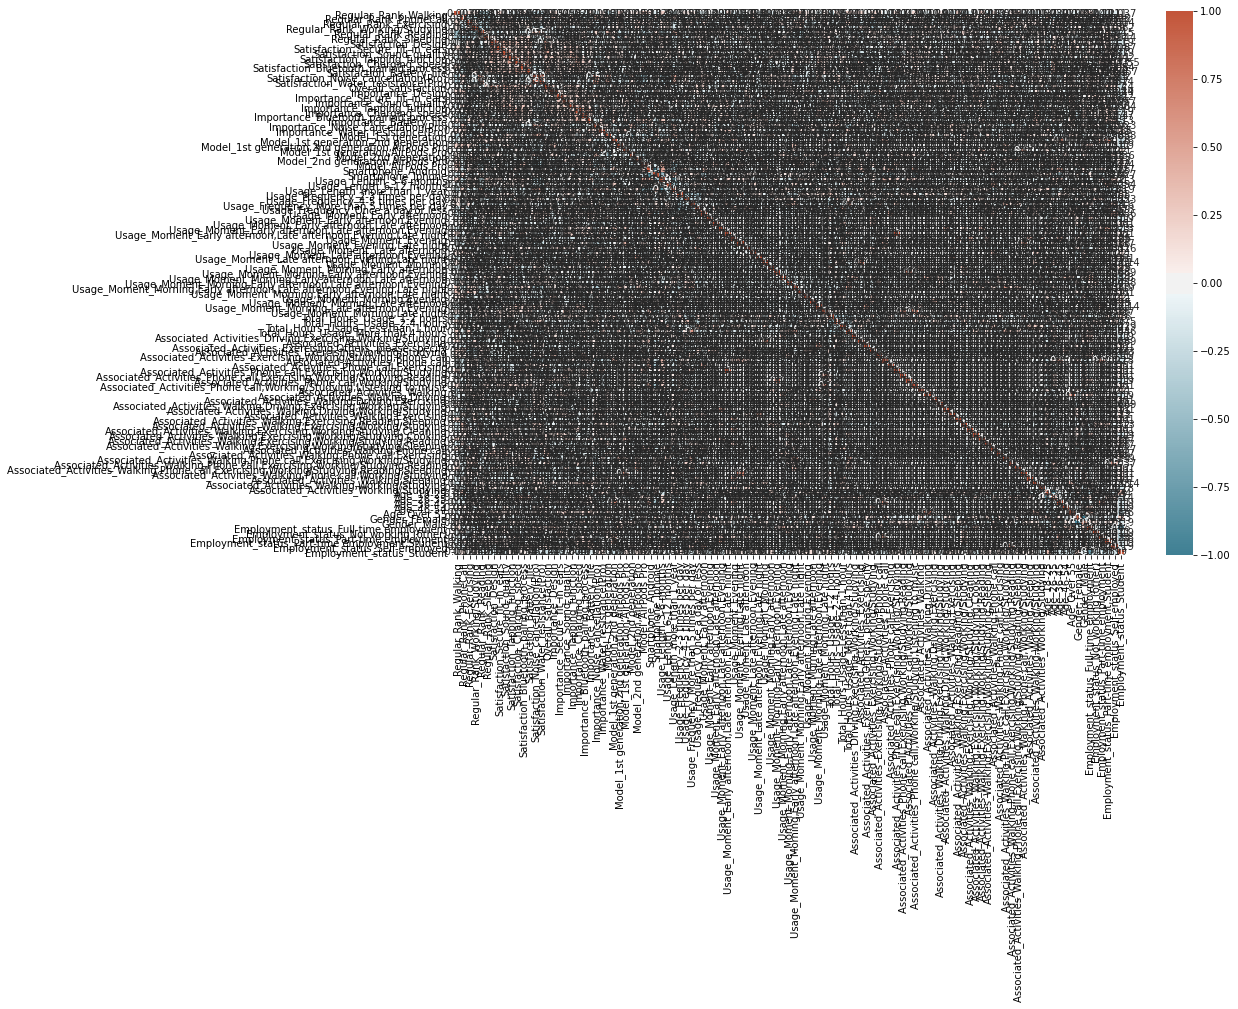

In [96]:
# Correlation analysis
import matplotlib as plt
corr = temp4.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [97]:
# Review covariance between attribute (including all data points)
import matplotlib.pyplot as plt

corr_matrix=temp4.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [100]:
# Select correlations with target variable - Overall Satisfaction
outcome_cor = corr["Overall_satisfaction"]
outcome_cor.describe()
absoutcome_cor = outcome_cor.abs()
sortabscor = absoutcome_cor.sort_values(ascending=False)

# Top 10 features that are highest correlated with target variable - Overall Satisfaction
sortabscor.head(n=11)

Overall_satisfaction                                   1.000000
Satisfaction_Design                                    0.584055
Satisfaction_Sound_quality                             0.496995
Satisfaction_Secure_fit_in_ears                        0.463851
Satisfaction_Battery_life                              0.422929
Associated_Activities_Walking,Phone call,Exercising    0.342801
Satisfaction_Charging_speed                            0.248262
Satisfaction_Tapping_function                          0.245714
Employment_status_Student                              0.236748
Importance_Tapping_function                            0.220123
Age_18-25                                              0.215029
Name: Overall_satisfaction, dtype: float64

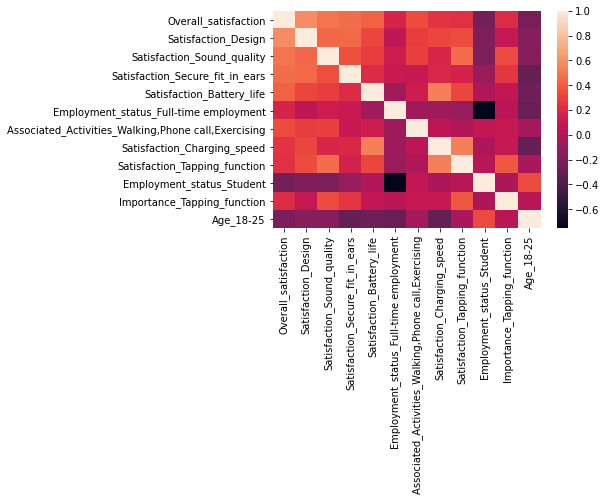

In [108]:
# Create another correlation matrix with top 10 features
import os
import seaborn as sn

# Selected columns of the dataset
top10_col = ['Overall_satisfaction','Satisfaction_Design','Satisfaction_Sound_quality','Satisfaction_Secure_fit_in_ears',
            'Satisfaction_Battery_life','Employment_status_Full-time employment','Associated_Activities_Walking,Phone call,Exercising',
            'Satisfaction_Charging_speed', 'Satisfaction_Tapping_function', 'Employment_status_Student',
            'Importance_Tapping_function', 'Age_18-25']
temp4top10 = temp4[top10_col]
corr_matrix2 = temp4top10.corr()
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix2)

### 6. Modeling

In [109]:
# Total missing values for each feature
temp4.isnull().sum()

Regular_Rank_Walking                              0
Regular_Rank_PhoneCall                            0
Regular_Rank_Exercising                           0
Regular_Rank_Working/Studying                     0
Regular_Rank_Reading                              0
                                                 ..
Employment_status_Not working (other)             0
Employment_status_Part-time employment            0
Employment_status_Part-time employment,Student    0
Employment_status_Self-employed                   0
Employment_status_Student                         0
Length: 111, dtype: int64

In [110]:
np.isnan(temp4)
np.where(np.isnan(temp4))

(array([], dtype=int64), array([], dtype=int64))

In [111]:
# Separate feature variables and target variable
X = temp4.drop(['Overall_satisfaction'], axis = 1)
y = temp4['Overall_satisfaction']

In [112]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [113]:
# Split data
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [114]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [115]:
# Decision Tree
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from pydot import graph_from_dot_data
iris = load_iris()

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=None)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

y_pred1 = model1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[6 1 1 0]
 [3 5 3 0]
 [1 1 0 0]
 [0 2 0 0]]
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         8
           2       0.56      0.45      0.50        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.48        23
   macro avg       0.29      0.30      0.29        23
weighted avg       0.47      0.48      0.47        23



In [116]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.60      0.82      0.69        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.65        23
   macro avg       0.34      0.39      0.36        23
weighted avg       0.55      0.65      0.59        23



### 7. Feature Importance

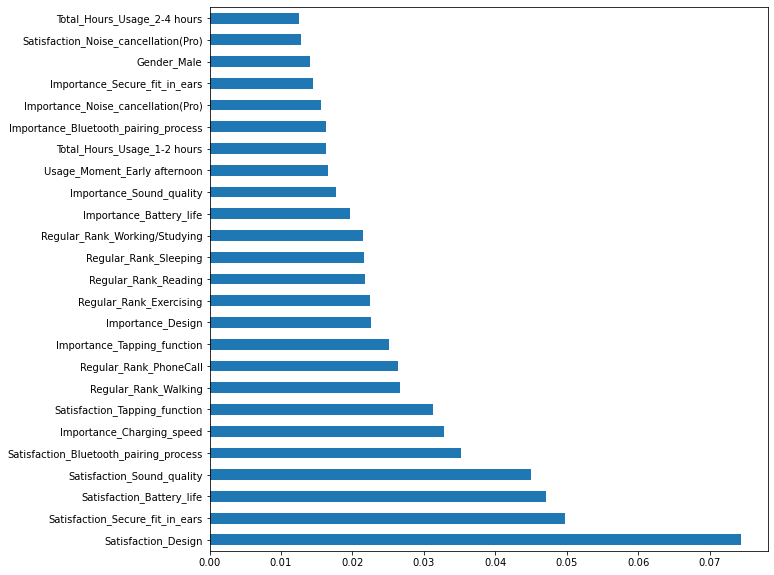

In [117]:
# via Random Forest
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))